In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


# Reading and Displaying data set

In [6]:
df=pd.read_csv("drug200.csv")

In [8]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Data Visualisation

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
tdf=df['Sex'].value_counts().reset_index()
tdf1=df['BP'].value_counts().reset_index()
tdf2=df['Drug'].value_counts().reset_index()

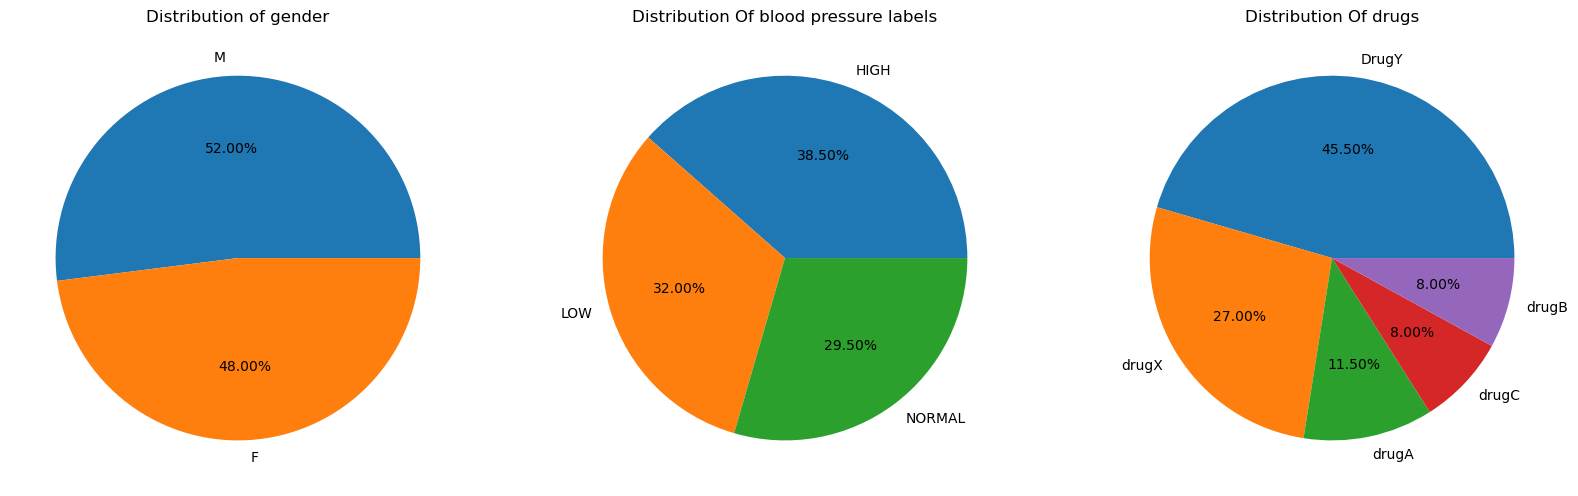

In [53]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].pie(x=tdf['count'],labels=tdf['Sex'],autopct="%.2f%%")
ax[0].set_title("Distribution of gender")
ax[1].pie(x=tdf1['count'],labels=tdf1['BP'],autopct="%.2f%%")
ax[1].set_title("Distribution Of blood pressure labels")
ax[2].pie(x=tdf2['count'],labels=tdf2['Drug'],autopct="%.2f%%")
ax[2].set_title("Distribution Of drugs")
plt.show()

Findings-
* Sex column is kinnd of balanced which is a good thing
* The three blood sugar levels are also kindad similar
* Drug Y and drug X occupy about 72% of the data

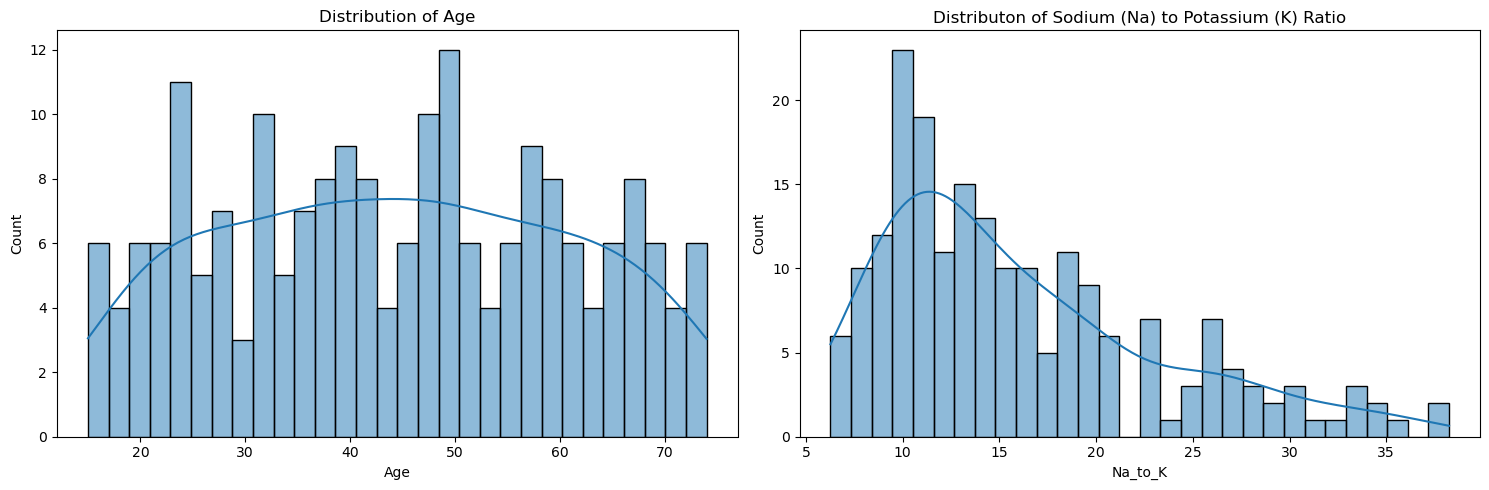

In [69]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df,x='Age',kde=True,ax=ax[0],bins=30)
ax[0].set_title('Distribution of Age')
sns.histplot(data=df,x='Na_to_K',kde=True,ax=ax[1],bins=30)
ax[1].set_title('Distributon of Sodium (Na) to Potassium (K) Ratio')
plt.tight_layout()
plt.show()

Findings-
### Age distribution
* There is no regular pattern as seen in the graph
* There is no significant skewness as seen
* The graph kinda peaks around 40- 60 years of age

## Distribution of Sodium to Potassium ratio
* the graph is clearly positively skewed which means majority of the data values are concentrated towards the left of the graph
* Major data values are in between 5 to 15 range

<Axes: xlabel='Drug', ylabel='count'>

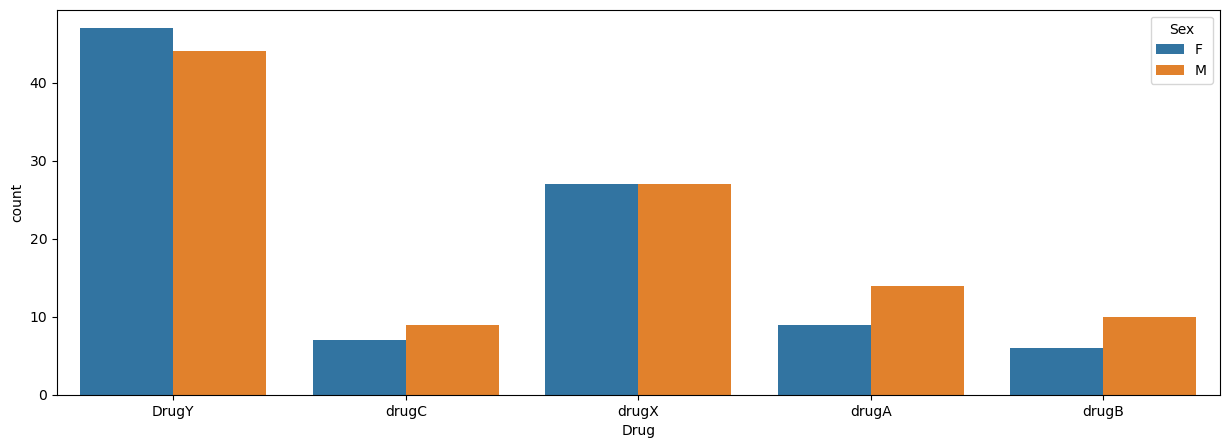

In [102]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x="Drug",hue="Sex")

### Findings:
* Drug X is equally taken by bot males and females
* Drug A, B and C are more takaen by males
* Drug Y is taken more by females

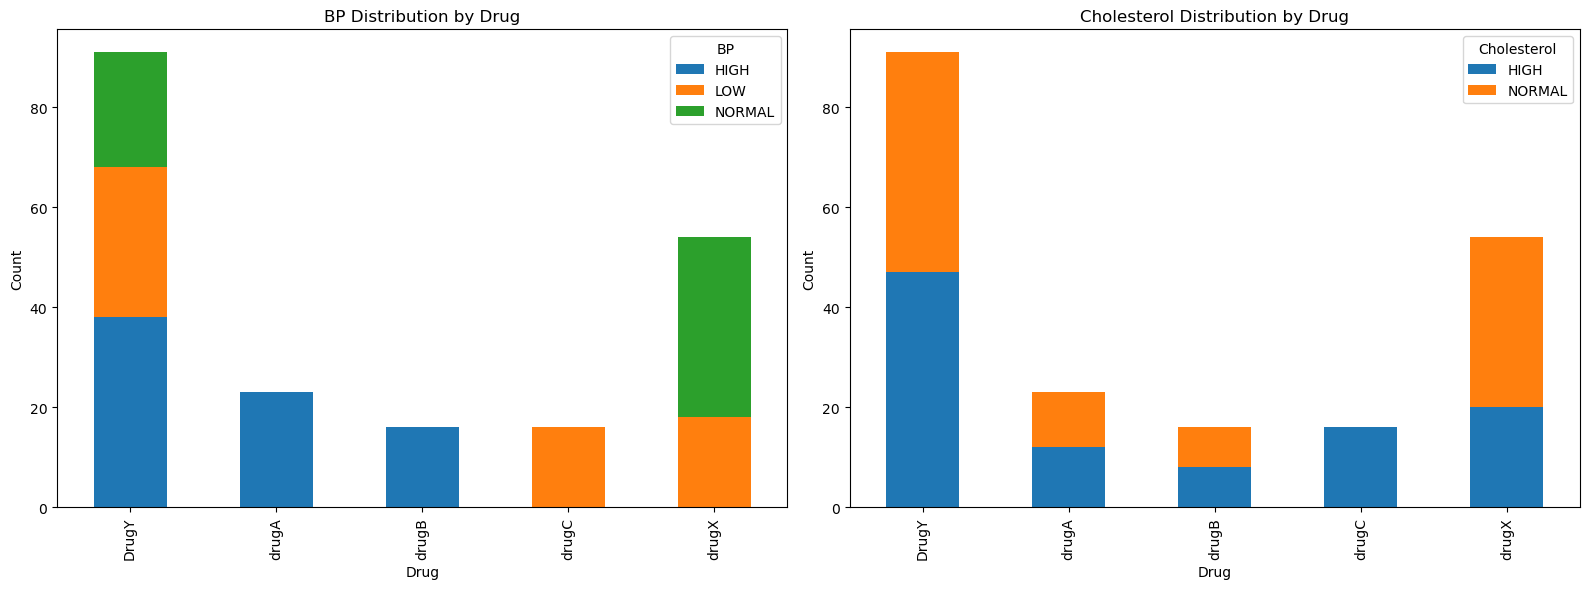

In [107]:
bp_counts=df.groupby(['Drug','BP']).size().unstack(fill_value=0)
cholesterol_counts=df.groupby(['Drug','Cholesterol']).size().unstack(fill_value=0)

fig, axes=plt.subplots(1,2,figsize=(16,6))
bp_counts.plot(kind='bar',stacked=True,ax=axes[0])
axes[0].set_title('BP Distribution by Drug')
axes[0].set_xlabel('Drug')
axes[0].set_ylabel('Count')
cholesterol_counts.plot(kind='bar',stacked=True,ax=axes[1],)
axes[1].set_title('Cholesterol Distribution by Drug')
axes[1].set_xlabel('Drug')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

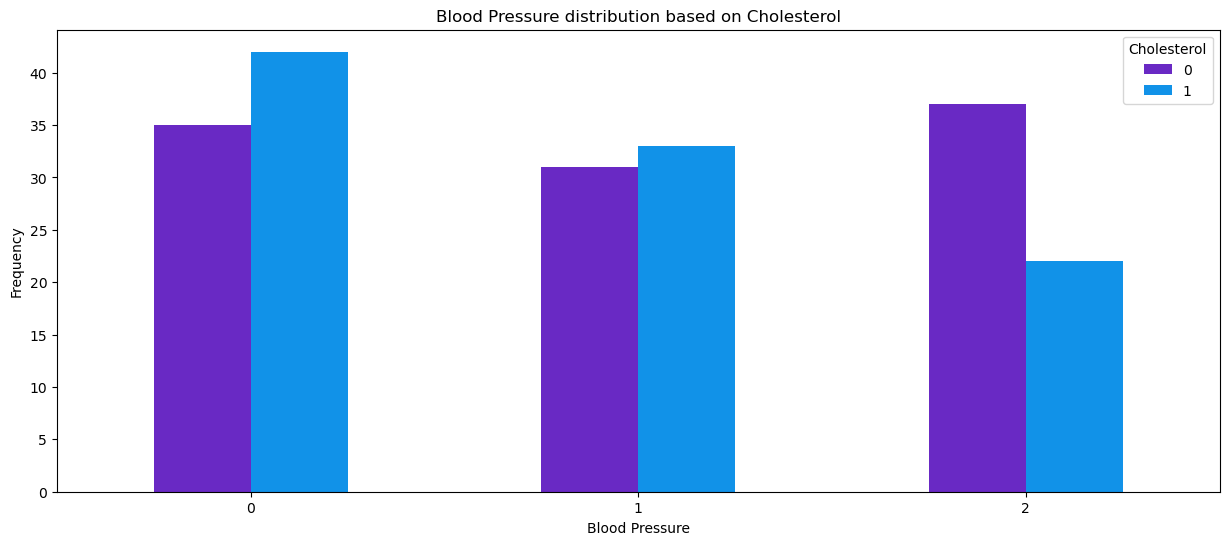

In [121]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

# Data preparation

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [111]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [113]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [115]:
from sklearn.preprocessing import LabelEncoder

In [117]:
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


In [136]:
from sklearn.model_selection import train_test_split
X=df.drop("Drug",axis=1)
y=df["Drug"]

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


### Using Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)



from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 87.50%


## Using K Neighbours

In [150]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

K Neighbours accuracy is: 62.50%


### using SVC

In [152]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

C:\Users\tiwar\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [155]:
from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

SVC accuracy is: 97.50%


### using Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

Decision Tree accuracy is: 97.50%


### using RandomForestClassifier

In [159]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest accuracy is: 97.50%


## Model Comparison

In [169]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',  'SVM',  'Decision Tree',  'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100,  SVCAcc*100,  DTAcc*100, RFAcc*100]})

In [171]:
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,SVM,97.5
3,Decision Tree,97.5
4,Random Forest,97.5
0,Logistic Regression,87.5
1,K Neighbors,62.5
